In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv("../csv_metrics.csv")
df.head()

,algorithm_name,total_distance,total_nodes,satisfaction_percentage
0,Direct Matching,213137.069473,1000,81.600000
1,Optimized Direct Matching,57347.113964,1000,89.900000
2,YouSupply,7574.874242,1000,86.000000
3,ODM + YouSupply,16505.118198,140,54.285714


In [23]:
df["avg_distance_per_node"] = df["total_distance"] / df["total_nodes"]
df.head()

,algorithm_name,total_distance,total_nodes,satisfaction_percentage,avg_distance_per_node
0,Direct Matching,213137.069473,1000,81.600000,213.137069
1,Optimized Direct Matching,57347.113964,1000,89.900000,57.347114
2,YouSupply,7574.874242,1000,86.000000,7.574874
3,ODM + YouSupply,16505.118198,140,54.285714,117.893701
4,"Pipeline of [2, 3]",24079.992441,1000,93.600000,24.079992


In [21]:
def pipeline(rows):
    '''
        Assumes a bunch of rows are done in a particular order
            1. First algorithm runs on a simulation
            2. Next algorithm runs on a new simulation of all the unsatisfied nodes from previous algorithm
            3. Continue till all rows are added together
    '''
    total_nodes = df.iloc[rows[0]]["total_nodes"]
    unsatisfied_nodes = df.iloc[rows[-1]]["total_nodes"] - df.iloc[rows[-1]]["total_nodes"] * (0.01 * df.iloc[rows[-1]]["satisfaction_percentage"])
    sat_percentage = ((total_nodes - unsatisfied_nodes)/total_nodes) * 100
    
    total_distance = df.iloc[rows]["total_distance"].sum()
    avg_distance = total_distance/total_nodes

    df.loc[len(df)] = [f"Pipeline of {rows}",total_distance,total_nodes,sat_percentage,avg_distance]
    return sat_percentage,total_distance,avg_distance

In [22]:
pipeline([2,3])

(np.float64(93.60000000000001),
 np.float64(24079.992440624206),
 np.float64(24.079992440624206))

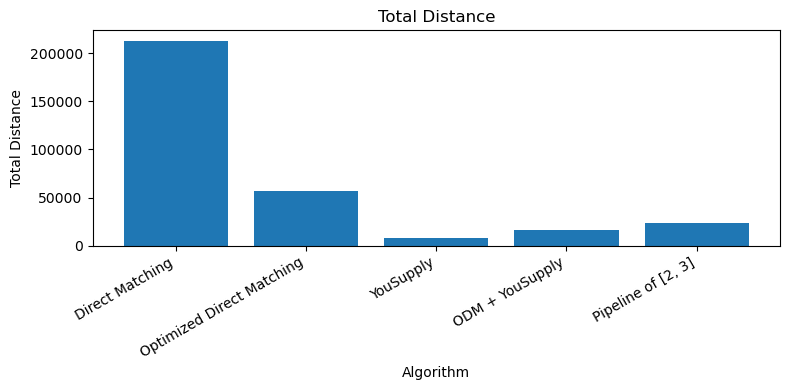

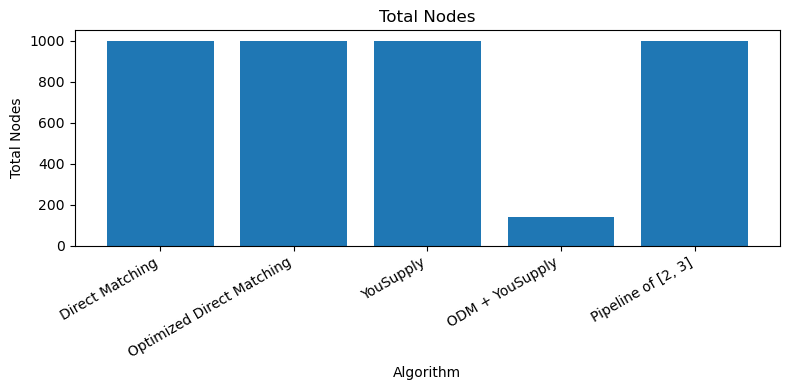

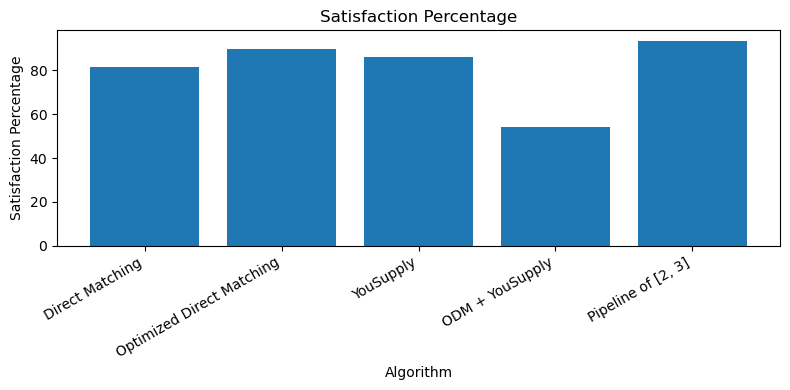

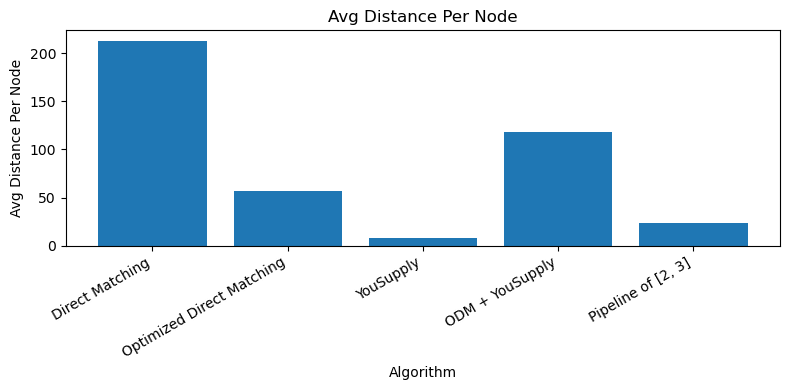

In [ ]:
metrics = [
    "total_distance",
    "satisfaction_percentage",
    "avg_distance_per_node"
]

for metric in metrics:
    plt.figure(figsize=(8, 4))
    plt.bar(df["algorithm_name"], df[metric])
    plt.title(metric.replace("_", " ").title())
    plt.xlabel("Algorithm")
    plt.ylabel(metric.replace("_", " ").title())
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()